## Decision Trees

#### Part 1. Entropy Computing

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('food.csv', sep='\t')
X = data.drop('Demand', axis = 1)
y = np.array([int(i == 'Yes') for i in data.Demand])

In [3]:
X.head()

,Food,Price,Taste
0,Pizza,3,2
1,Pizza,4,1
2,Pizza,1,3
3,Pizza,5,5
4,Pizza,5,4


In [4]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [5]:
# Рассчитайте начальную энтропию отклика
def get_H(p):
    p = np.array(p)
    return sum(-p*np.log2(p))

p = np.array([sum(y)/len(y), 1-sum(y)/len(y)])
H = get_H(p)
np.round(H, 3)

0.934

In [6]:
# Probabilities
# (Demand|Pizza), (Demand|SUSHI), (Demand|Burgers)
food_index = {'Pizza':0, 
              'Sushi':1, 
              'Burgers':2}


probs_food = np.array([[0, 0],
                       [0, 0],
                       [0, 0]])
food_type_prob = np.array([0, 0, 0])
                       
for f, d in zip(X.Food, y):
    food_type_prob[food_index[f]] += 1
    probs_food[food_index[f]][d] += 1


for food in food_index:
    print(f'(Demand|{food}):')
    print(f'\tYes: {probs_food[food_index[food]][1]}/{sum(probs_food[food_index[food]])}')
    print(f'\tNo:  {probs_food[food_index[food]][0]}/{sum(probs_food[food_index[food]])}')

# for the future
probs_food = probs_food.astype(float)
for i in range(len(probs_food)):
    probs_food[i] /= sum(probs_food[i])
    
food_type_prob = food_type_prob.astype(float)
food_type_prob /= sum(food_type_prob)

(Demand|Pizza):
	Yes: 3/5
	No:  2/5
(Demand|Sushi):
	Yes: 5/8
	No:  3/8
(Demand|Burgers):
	Yes: 5/7
	No:  2/7


In [7]:
# Вычислите условные энтропии эксперимента  при условии, 
# что выбрана пицца, суши или бургер.
food_h = []
for pp, food in zip(probs_food, food_index):
    food_h.append(get_H(pp))
    print(f'H({food}): {np.round(food_h[-1], 3)}')    

H(Pizza): 0.971
H(Sushi): 0.954
H(Burgers): 0.863


In [8]:
print(food_type_prob)

[0.25 0.4  0.35]


In [9]:
# IG(Demand|Food)
H - sum(food_h * food_type_prob)

0.007464606593517109

###### Summarizing: 

In [10]:
def count_entropy_IG(x, y):
    
    # Class probability
    def get_H(p):
        p = np.array(p)
        return sum(-p*np.log2(p))
    p_aprior = np.array([sum(y)/len(y), 1-sum(y)/len(y)])
    H = get_H(p_aprior)
    
    # Probabilities
    index_counter = 0
    indexes = {}
    # P(Demand|class_0), P(Demand|class_1), ...
    yes_no_probs = []
    # P(class_0), P(class_1), ...
    class_prob = []

    for cur_class, d in zip(x, y):
#         print(cur_class, d)
#         print(yes_no_probs)
#         print(class_prob)
#         print(indexes)
#         print('\n\n')
        if not cur_class in indexes:
            indexes.update({cur_class:index_counter})
            class_prob.append(0)
            yes_no_probs.append([0, 0])
            index_counter += 1
        class_prob[indexes[cur_class]] += 1
        yes_no_probs[indexes[cur_class]][d] += 1
    
    yes_no_probs = np.array(yes_no_probs)
    class_prob = np.array(class_prob)

    for food in indexes:
        print(f'(Demand|{food}):')
        print(f'\tYes: {yes_no_probs[indexes[food]][1]}/{sum(yes_no_probs[indexes[food]])}')
        print(f'\tNo:  {yes_no_probs[indexes[food]][0]}/{sum(yes_no_probs[indexes[food]])}')

    # for the future
    yes_no_probs = yes_no_probs.astype(float)
    for i in range(len(yes_no_probs)):
        yes_no_probs[i] /= sum(yes_no_probs[i])

    class_prob = class_prob.astype(float)
    class_prob /= sum(class_prob)
    
    # H(Demand|class)
    class_H = []
    for pp, cur_class in zip(yes_no_probs, indexes):
        class_H.append(get_H(pp))
        print(f'H({cur_class}): {np.round(class_H[-1], 3)}')
    print(class_prob, class_H)
    # IG(Demand|Class)
    print('\nINFORMATION GAIN')
    print(np.round(H - sum(class_H * class_prob), 3))

In [11]:
count_entropy_IG(X.Food, y)

(Demand|Pizza):
	Yes: 3/5
	No:  2/5
(Demand|Sushi):
	Yes: 5/8
	No:  3/8
(Demand|Burgers):
	Yes: 5/7
	No:  2/7
H(Pizza): 0.971
H(Sushi): 0.954
H(Burgers): 0.863
[0.25 0.4  0.35] [0.9709505944546686, 0.9544340029249649, 0.863120568566631]

INFORMATION GAIN
0.007


In [12]:
count_entropy_IG(X.Price, y)

(Demand|3):
	Yes: 3/4
	No:  1/4
(Demand|4):
	Yes: 3/5
	No:  2/5
(Demand|1):
	Yes: 2/4
	No:  2/4
(Demand|5):
	Yes: 4/5
	No:  1/5
(Demand|2):
	Yes: 1/2
	No:  1/2
H(3): 0.811
H(4): 0.971
H(1): 1.0
H(5): 0.722
H(2): 1.0
[0.2  0.25 0.2  0.25 0.1 ] [0.8112781244591328, 0.9709505944546686, 1.0, 0.7219280948873623, 1.0]

INFORMATION GAIN
0.049


In [14]:
count_entropy_IG(X.Taste, y)

(Demand|2):
	Yes: 4/5
	No:  1/5
(Demand|1):
	Yes: 1/3
	No:  2/3
(Demand|3):
	Yes: 3/5
	No:  2/5
(Demand|5):
	Yes: 3/4
	No:  1/4
(Demand|4):
	Yes: 2/3
	No:  1/3
H(2): 0.722
H(1): 0.918
H(3): 0.971
H(5): 0.811
H(4): 0.918
[0.25 0.15 0.25 0.2  0.15] [0.7219280948873623, 0.9182958340544896, 0.9709505944546686, 0.8112781244591328, 0.9182958340544896]

INFORMATION GAIN
0.073


#### Part2. Trees

In [17]:
df = pd.read_csv('diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Отбор первых 690 строк:

In [18]:
task_data = df.head(690)

Вывод числа строк в получившейся выборке и относящихся к классу 0 (пациент не болен диабетом)

In [19]:
len(task_data[task_data['Outcome'] == 0])

453

Разделеные данных на тренировочные и тестовые. Первые 80% строк — тренировочные, остальные — тестовые.

In [20]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

Выделяем предикторы (8 первых столбцов) и отклик (Outcome):

In [21]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Подключем классификатор DecisionTreeClassifier:

In [22]:
from sklearn.tree import DecisionTreeClassifier

Задаем параметры дерева принятия решений и обучаем модель:

In [23]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

Подключаем библиотеку для визуализации дерева. Сохраняем в файл и выводим на экран.

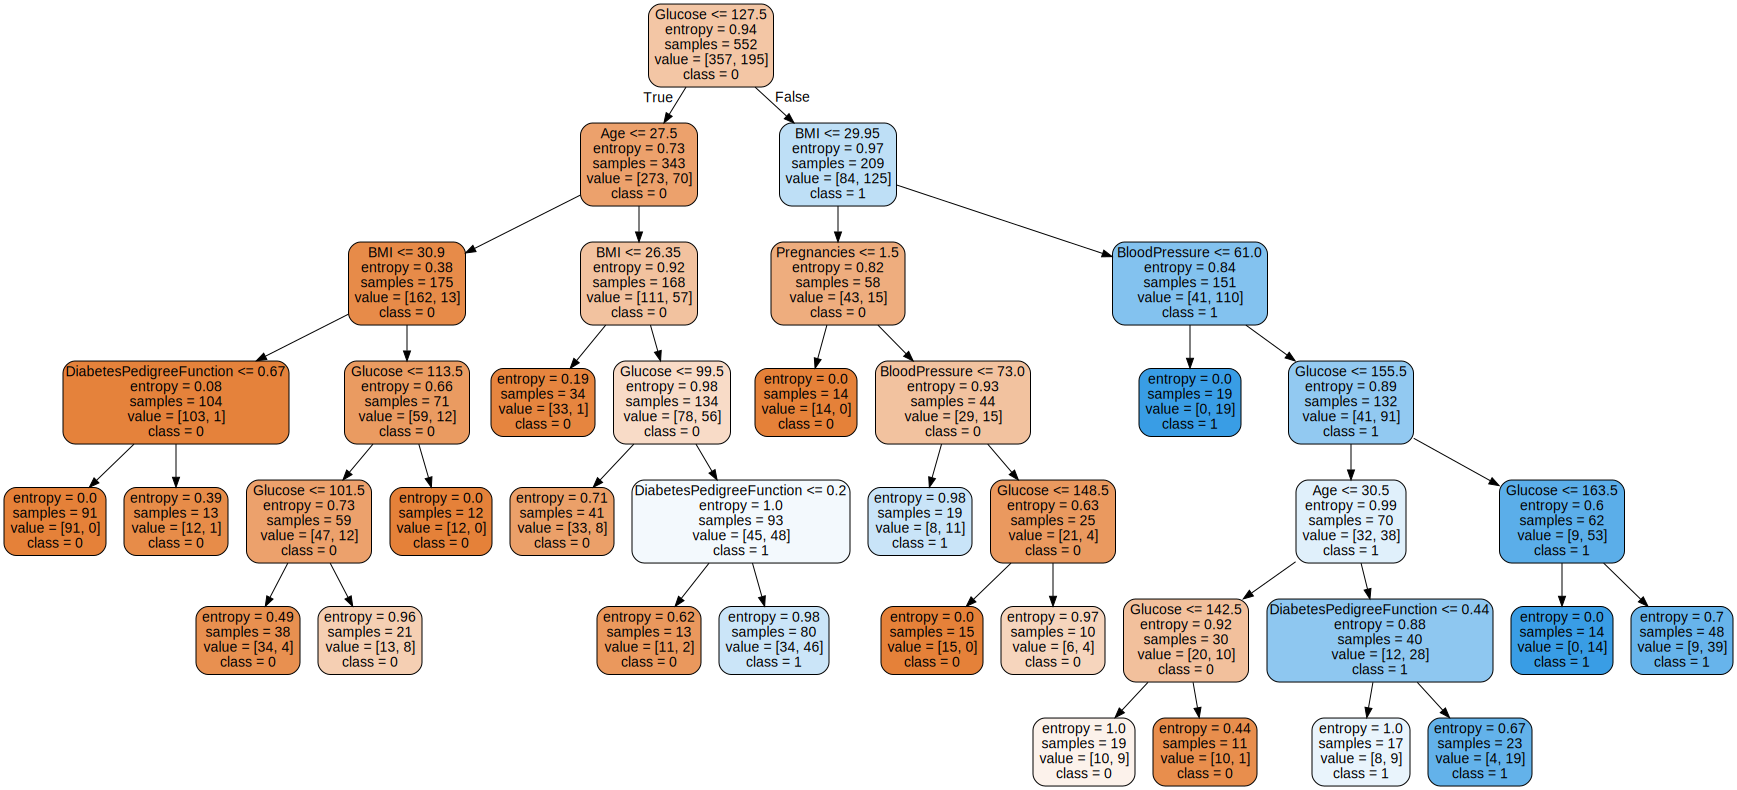

In [24]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Выводим глубину дерева:

In [25]:
clf.tree_.max_depth

6

Выполняем предсказание для объектов из тестовой выборки:

In [26]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

Доля правильных ответов классификатора:

In [28]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_true, y_pred), 2)

0.79

Среднее значение метрик $F_1$ (Macro-F1):

In [31]:
from sklearn.metrics import f1_score
np.round(f1_score(y_true, y_pred, average='macro'), 2)

0.75

Выполним предсказание для конкретного объекта (с индексом 708) исходных данных:

In [41]:
indexes = [727, 710, 704, 729]
df.loc[indexes, features]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
727,0,141,84,26,0,32.4,0.433,22
710,3,158,64,13,387,31.2,0.295,24
704,4,110,76,20,100,28.4,0.118,27
729,2,92,52,0,0,30.1,0.141,22


Назначенный класс:

In [42]:
clf.predict(df.loc[indexes, features])

array([0, 1, 0, 0])